{Question - 1} What is Boosting in Machine Learning?
Boosting is an ensemble technique that combines multiple weak learners, typically decision trees, to form a strong learner. Unlike Bagging, Boosting builds models sequentially, where each new model tries to correct the errors made by previous ones. The final prediction is made through weighted voting (classification) or averaging (regression), focusing on difficult-to-predict instances. Boosting reduces both bias and variance, often resulting in higher accuracy than individual models.

{Question - 2} How does Boosting differ from Bagging?
Boosting and Bagging both ensemble multiple models, but Boosting builds models sequentially, where each focuses on the errors of the previous. Bagging builds them in parallel and combines results to reduce variance. Boosting reduces both bias and variance, while Bagging mainly reduces variance. Also, Boosting assigns weights to data points, emphasizing difficult cases.

{Question - 3} What is the key idea behind AdaBoost?
The key idea behind AdaBoost (Adaptive Boosting) is to sequentially train weak learners, where each learner pays more attention to the errors made by its predecessors. It assigns weights to training instances, increasing them for misclassified examples. The final prediction is a weighted vote from all models. It helps in improving classification performance with minimal complexity.

{Question - 4} Explain the working of AdaBoost with an example
AdaBoost begins by training a weak learner on the full dataset. Then, it increases the weights of misclassified instances and trains a new model. This continues for a set number of iterations. Each model contributes to the final prediction based on its accuracy. For example, using decision stumps, AdaBoost can boost them into a highly accurate model by focusing on difficult samples in each round.

{Question - 5} What is Gradient Boosting, and how is it different from AdaBoost?
Gradient Boosting builds trees sequentially like AdaBoost but uses gradient descent to minimize a loss function. Each new model is trained to predict the residual errors (gradients) of the previous one. AdaBoost adjusts weights on data points, while Gradient Boosting fits to residuals. Gradient Boosting is more general and can optimize arbitrary differentiable loss functions.

{Question - 6} What is the loss function in Gradient Boosting?
Gradient Boosting minimizes a loss function by adding trees that predict residuals. The loss function depends on the problem: for regression it's often mean squared error (MSE); for classification, it's typically log-loss (cross-entropy). The model learns gradients of this loss to update predictions, improving performance iteratively.

{Question - 7} How does XGBoost improve over traditional Gradient Boosting?
XGBoost (Extreme Gradient Boosting) improves traditional Gradient Boosting with regularization (to prevent overfitting), parallel processing, handling missing data, and tree pruning strategies. It also supports early stopping and uses a more efficient approximation algorithm. XGBoost is known for its speed and superior performance in many ML competitions.

{Question - 8} What is the difference between XGBoost and CatBoost?
XGBoost is optimized for speed and handles numeric data well. CatBoost is specifically designed for categorical data, automating encoding and reducing preprocessing. CatBoost uses ordered boosting to avoid overfitting and supports GPU training. While XGBoost is more widely adopted, CatBoost performs better on datasets with categorical features.

{Question - 9} What are some real-world applications of Boosting techniques?
Boosting is widely used in finance (credit scoring, fraud detection), healthcare (disease prediction), marketing (customer churn prediction), and competitions (Kaggle). XGBoost and LightGBM are frequently chosen for structured/tabular data due to their performance and versatility.

{Question - 10} How does regularization help in XGBoost?
Regularization in XGBoost controls model complexity to prevent overfitting. It adds penalties (L1/L2) to the loss function, discouraging overly complex trees. Parameters like alpha (L1) and lambda (L2) allow fine control. This leads to better generalization and more robust models on unseen data.

{Question - 11} What are some hyperparameters to tune in Gradient Boosting models?
Key hyperparameters include:

n_estimators: number of boosting rounds

learning_rate: controls step size

max_depth: tree depth

subsample: fraction of samples

min_samples_split & min_samples_leaf: for node splitting

loss: loss function
Tuning these improves bias-variance balance.

{Question - 12} What is the concept of Feature Importance in Boosting?
Feature importance in Boosting measures how often and how effectively a feature contributes to splits in trees. It can be based on gain (loss reduction), coverage (frequency of use), or weight (number of splits). Visualizing importance helps in model interpretability and feature selection.

{Question - 13} Why is CatBoost efficient for categorical data?
CatBoost handles categorical variables natively using “ordered target statistics” to avoid target leakage. It encodes categories during training without manual preprocessing. This leads to better performance, less preprocessing effort, and reduced overfitting compared to one-hot or label encoding.

In [1]:
# {Question - 14} Train an AdaBoost Classifier on a sample dataset and print model accuracy
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_test, model.predict(X_test)))


Accuracy: 0.9473684210526315


In [2]:
# {Question - 15} Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = AdaBoostRegressor(n_estimators=50)
model.fit(X_train, y_train)
print("MAE:", mean_absolute_error(y_test, model.predict(X_test)))


MAE: 44.5153552740593


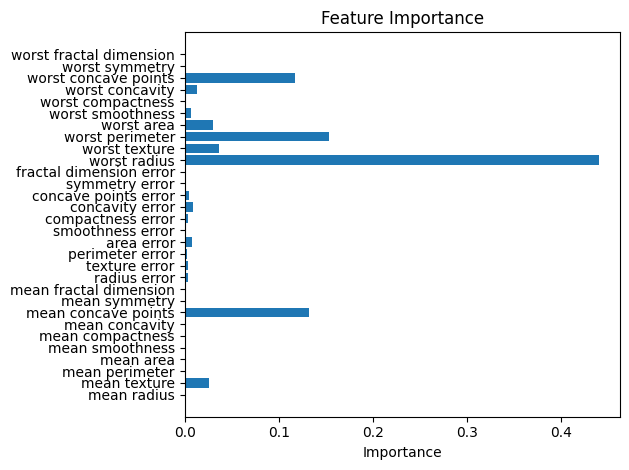

In [3]:
# {Question - 16} Gradient Boosting Classifier on Breast Cancer dataset with feature importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

model = GradientBoostingClassifier().fit(X, y)
importances = model.feature_importances_

plt.barh(data.feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [4]:
# {Question - 17} Gradient Boosting Regressor evaluated using R-Squared Score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GradientBoostingRegressor().fit(X_train, y_train)
print("R2 Score:", model.score(X_test, y_test))


R2 Score: 0.42334227415770376


In [5]:
# {Question - 18} Compare XGBoost Classifier with Gradient Boosting
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
gb = GradientBoostingClassifier()

xgb.fit(X_train, y_train)
gb.fit(X_train, y_train)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb.predict(X_test)))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:46:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 1.0
Gradient Boosting Accuracy: 1.0


In [6]:
# {Question - 19} Train a CatBoost Classifier and evaluate using F1-Score
!pip install -q catboost
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

print("F1 Score:", f1_score(y_test, model.predict(X_test)))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.8 MB/s eta 0:00:00
F1 Score: 0.9777777777777777


In [7]:
# {Question - 20} XGBoost Regressor and evaluate using MSE
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)
print("MSE:", mean_squared_error(y_test, model.predict(X_test)))


MSE: 0.2161409990991321


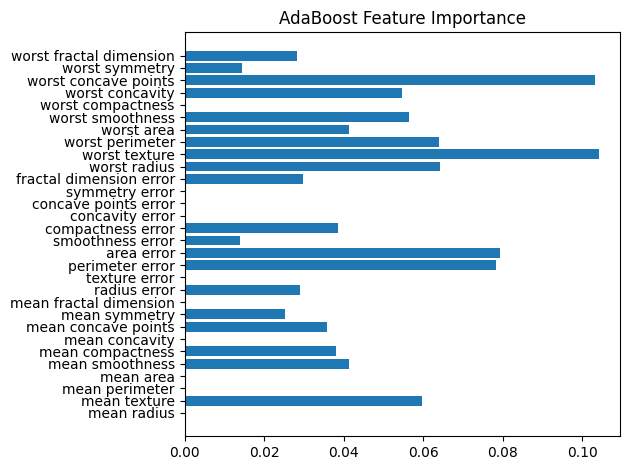

In [8]:
# {Question - 21} AdaBoost Classifier and visualize feature importance
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50)
model.fit(X, y)
plt.barh(data.feature_names, model.feature_importances_)
plt.title("AdaBoost Feature Importance")
plt.tight_layout()
plt.show()


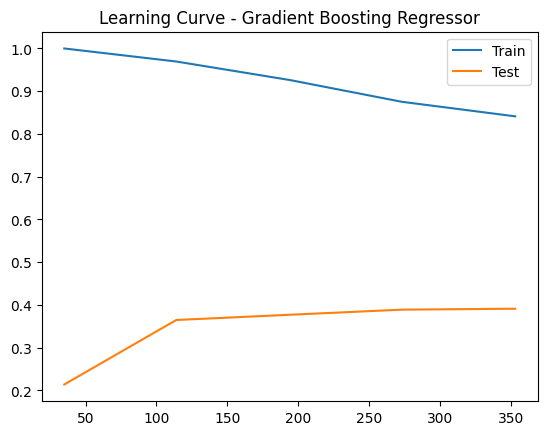

In [9]:
# {Question - 22} Gradient Boosting Regressor and plot learning curves
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

X, y = load_diabetes(return_X_y=True)

train_sizes, train_scores, test_scores = learning_curve(
    GradientBoostingRegressor(), X, y, cv=5, scoring='r2')

plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Train')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Test')
plt.title("Learning Curve - Gradient Boosting Regressor")
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:47:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

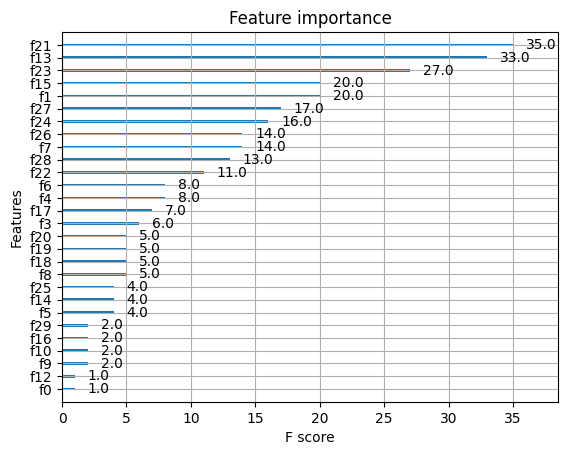

In [10]:
# {Question - 23} XGBoost Classifier and visualize feature importance
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X, y)
plot_importance(model)


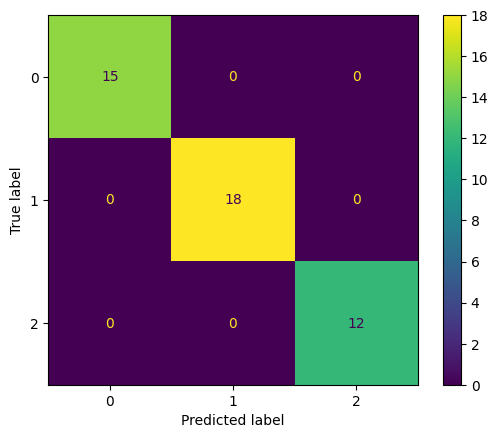

In [11]:
# {Question - 24} CatBoost Classifier and plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from catboost import CatBoostClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test))
plt.show()


In [12]:
# {Question - 25} AdaBoost Classifier with different n_estimators
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for n in [10, 50, 100]:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    print(f"n_estimators={n}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")


n_estimators=10, Accuracy=1.0
n_estimators=50, Accuracy=0.9473684210526315
n_estimators=100, Accuracy=0.9736842105263158


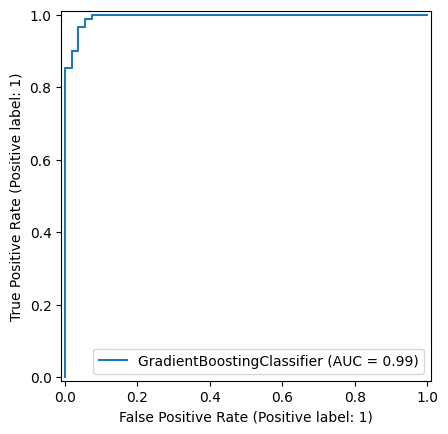

In [13]:
# {Question - 26} Gradient Boosting Classifier and visualize the ROC curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = GradientBoostingClassifier().fit(X_train, y_train)
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [14]:
# {Question - 27} XGBoost Regressor - tune learning rate using GridSearchCV
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

param_grid = {'learning_rate': [0.01, 0.1, 0.3]}
model = GridSearchCV(XGBRegressor(), param_grid, cv=3)
model.fit(X_train, y_train)
print("Best learning rate:", model.best_params_)


Best learning rate: {'learning_rate': 0.3}


In [15]:
# {Question - 28} CatBoost Classifier on imbalanced dataset with class weights
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = CatBoostClassifier(class_weights=[1, 10], verbose=0)
model.fit(X_train, y_train)
print("F1 Score:", f1_score(y_test, model.predict(X_test)))


F1 Score: 0.7555555555555555


In [16]:
# {Question - 29} AdaBoost Classifier with different learning rates
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

for lr in [0.01, 0.1, 1]:
    model = AdaBoostClassifier(learning_rate=lr, n_estimators=50)
    model.fit(X_train, y_train)
    print(f"Learning Rate={lr}, Accuracy={accuracy_score(y_test, model.predict(X_test))}")


Learning Rate=0.01, Accuracy=0.6842105263157895
Learning Rate=0.1, Accuracy=1.0
Learning Rate=1, Accuracy=0.9473684210526315


In [17]:
# {Question - 30} XGBoost Classifier for multi-class classification and evaluate log-loss
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from xgboost import XGBClassifier

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softprob')
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, probs))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:48:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Log Loss: 0.08212887449369577
